In [111]:
import numpy as np

def euclidian(x1, x2):
    return np.linalg.norm(x1 - x2)

def update_centroids(data, predicted_classes, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        # pick features, which were assigned to class i
        indices = [index for index in range(len(predicted_classes)) if predicted_classes[index] == i]
        new_centroids[i, :] = np.mean(data[indices], axis=0)
    return new_centroids

def kmeans(data, k, epsilon=0, distance_func='euclidian'):
    # to track our centroids
    history_of_centroids = []
    if distance_func == 'euclidian':
        dist_method = euclidian
    # choose randomly initial centroids
    curr_centroids = data[np.random.randint(0, data.shape[0] - 1, size=k)]
    history_of_centroids.append(curr_centroids)

    prev_centroids = np.zeros(curr_centroids.shape)
    norm = dist_method(curr_centroids, prev_centroids)
    predicted_class = np.zeros((data.shape[0], 1))
    iteration = 0
    # train until norm reaches epsilon
    while norm > epsilon:
        iteration += 1
        norm = dist_method(curr_centroids, prev_centroids)
        
        for idx, feature in enumerate(data):
            distance_vector = np.zeros((k, 1))
            for idx_centroid, centroid in enumerate(curr_centroids):
                distance_vector[idx_centroid, :] = dist_method(feature, centroid)
            predicted_class[idx, 0] = np.argmin(distance_vector)
            
        prev_centroids = curr_centroids
        curr_centroids = update_centroids(data, predicted_class, k)
        history_of_centroids.append(curr_centroids)
    return curr_centroids, history_of_centroids, predicted_class

# test our model on iris data set
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
# use only two features
centroids, history, preds = kmeans(X[:,:2], 3)

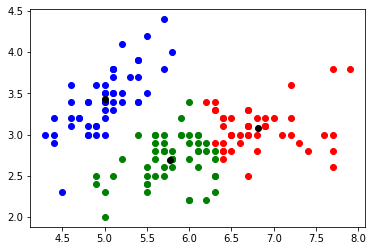

In [112]:
def plot_results(history, preds, centroids, data):
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    for index in range(3):
        close_features_ids = [i for i in range(len(preds)) if preds[i] == index]
        for idx in close_features_ids:
            ax.plot(data[idx][0], data[idx][1], (colors[index]+'o'))
    for centroid in centroids:
        ax.plot(centroid[0], centroid[1], 'ko')      
plot_results(history, preds, centroids, X[:, :2])